# Lecture 4: List comprehension & NumPy
ENVR 890-010: Python for Environmental Research, Fall 2021

September 10, 2021

By Andrew Hamilton. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Summary
In this lecture, we will first learn about using **list comprehensions** to write for loops in a more efficient and compact way. We will then move beyond the standard data structures (list, tuple, dictionary) to a more advanced data structure called a **NumPy array**. Along the way, we will learn how **logical indexing** can be used with NumPy as a powerful tool to retrieve and manipulate particular subsets of data.

## List comprehensions
As we learned last week, **loops** can be used to execute a code block for every item in a list. For example, to a list of all integer degrees between 0 and 90 converted to radians, we can write:

In [1]:
import math

def degrees_to_radians(degrees):
    return degrees * (2 * math.pi / 360)

In [2]:
### create list of degrees
degrees = list(range(0, 91))

### use for loop to create list of radians
radians = []
for d in range(0, 91):
    radians.append( degrees_to_radians(d) )
    
print(degrees)
print()
print(radians)
print()
print( len(radians) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

[0.0, 0.017453292519943295, 0.03490658503988659, 0.05235987755982989, 0.06981317007977318, 0.08726646259971647, 0.10471975511965978, 0.12217304763960307, 0.13962634015954636, 0.15707963267948966, 0.17453292519943295, 0.19198621771937624, 0.20943951023931956, 0.22689280275926285, 0.24434609527920614, 0.2617993877991494, 0.2792526803190927, 0.29670597283903605, 0.3141592653589793, 0.33161255787892263, 0.3490658503988659, 0.3665191429188092, 0.3839724354387525, 0.4014257279586958, 0.4188790204786391, 0.4363323129985824, 0.4537856055185257, 0.47123889803846897, 0.4886921905584123, 0.5061454830783556, 0.5235987755982988, 0.5410520681182421, 

[**List comprehensions**](https://docs.python.org/3/tutorial/datastructures.html) are a way to write for loops in a more compact and computationally efficient way:

In [3]:
### do the same thing with list comprehension instead of for loop
radians_lc = [degrees_to_radians(d) for d in degrees]

print(radians_lc)
print()
### check that the two lists are equivalent
print(radians == radians_lc)

[0.0, 0.017453292519943295, 0.03490658503988659, 0.05235987755982989, 0.06981317007977318, 0.08726646259971647, 0.10471975511965978, 0.12217304763960307, 0.13962634015954636, 0.15707963267948966, 0.17453292519943295, 0.19198621771937624, 0.20943951023931956, 0.22689280275926285, 0.24434609527920614, 0.2617993877991494, 0.2792526803190927, 0.29670597283903605, 0.3141592653589793, 0.33161255787892263, 0.3490658503988659, 0.3665191429188092, 0.3839724354387525, 0.4014257279586958, 0.4188790204786391, 0.4363323129985824, 0.4537856055185257, 0.47123889803846897, 0.4886921905584123, 0.5061454830783556, 0.5235987755982988, 0.5410520681182421, 0.5585053606381855, 0.5759586531581288, 0.5934119456780721, 0.6108652381980153, 0.6283185307179586, 0.6457718232379019, 0.6632251157578453, 0.6806784082777885, 0.6981317007977318, 0.7155849933176751, 0.7330382858376184, 0.7504915783575618, 0.767944870877505, 0.7853981633974483, 0.8028514559173916, 0.8203047484373349, 0.8377580409572782, 0.855211333477221

The list comprehension syntax can be thought of as an **expression** (e.g., what to do to each element) followed by a **for clause**, all surrounded by brackets. 

We can include an **if clause** to include only certain elements (for example, those whose degrees are divisible by 10) in the final list:

In [4]:
### first use for loop combined with if statement
radians_divisible10 = []
for d in degrees:
    if d % 10 == 0:
        radians_divisible10.append( degrees_to_radians(d) )
print(radians_divisible10)
print()
print(len(radians_divisible10))

[0.0, 0.17453292519943295, 0.3490658503988659, 0.5235987755982988, 0.6981317007977318, 0.8726646259971648, 1.0471975511965976, 1.2217304763960306, 1.3962634015954636, 1.5707963267948966]

10


In [5]:
### now repeat with list comprehension
radians_divisible10_lc = [degrees_to_radians(d) for d in degrees if d % 10 == 0]

print(radians_divisible10_lc)
print()

print(radians_divisible10 == radians_divisible10_lc)

[0.0, 0.17453292519943295, 0.3490658503988659, 0.5235987755982988, 0.6981317007977318, 0.8726646259971648, 1.0471975511965976, 1.2217304763960306, 1.3962634015954636, 1.5707963267948966]

True


### In class exercise
Assume we work for the county office of environmental quality, and are administering a program that will provide subsidized water quality assessments for all households that rely on private groundwater wells and have incomes less than \$30,000 per year. 

First we will create random demographic data for 1000 households (but pretend for the exercise that this was retrieved from a county database).

In [6]:
import random
## numeric index for each household in county
household = ['H' + str(i) for i in list(range(1000))]
# print(household)

In [7]:
## randomly assign water source for each household
water = [random.choices(['municipal', 'private'], weights = [0.6, 0.4], k=1)[0] for h in household]
# print(water)

In [8]:
## randomly assign income for each household from Normal/Gaussian distribution
income = [max(random.gauss(50000, 20000), 0) for h in household]
# print(income)

1. Use list comprehension to find the list of households with a private water source? How many are there?

2. How many households meet both criteria for testing?

3. What are the average incomes for households with municipal and private water, respectively? Use the statistics.mean() function.

In [9]:
### import statistics library
import statistics

### test example to show how to use mean function
test_mean = statistics.mean([1,2,3])
print(test_mean)

2


## NumPy
[NumPy](https://numpy.org/doc/stable/) is one of the most popular packages for scientific computing and data science, and is included in the standard Anaconda installation. It is commonly imported with the **alias** ``np``. 

In [10]:
import numpy as np

### Creating NumPy arrays
NumPy supports a new type of data structure: the **NumPy array**. NumPy arrays are designed to handle large, multi-dimensional arrays of numbers much more easily and efficiently than standard lists.

In [11]:
# here is a standard list with two dimensions
l = [[1, 2, 3, 4, 5], [10, 9, 8, 7, 6]]
print(l, type(l))

[[1, 2, 3, 4, 5], [10, 9, 8, 7, 6]] <class 'list'>


In [12]:
# create a 2D numpy array from l
a = np.array(l)
print(a, type(a))

[[ 1  2  3  4  5]
 [10  9  8  7  6]] <class 'numpy.ndarray'>


Note that, unlike the basic data structures such as lists, **all elements in a NumPy array must be the same type**. Although string types are allowed, NumPy is most commonly used with numeric types such as int and float.

We access the elements the same way as lists:

In [13]:
print(l[1][0])
print(a[1][0])

10
10


Or, alternatively, in a single brackets and separated by a comma:

In [14]:
print(a[0, 2])

3


We can get the number of dimensions and the shape of an array using its ``ndim`` and ``shape`` **properties**. For a 2D array, the shape is (number of rows, number of columns). For larger arrays, it always goes from the innermost set of brackets to the outermost set of brackets.

In [15]:
print( a.ndim )
print( a.shape )
print()

### loop over rows
for i in range(a.shape[0]):
    ### loop over columns
    for j in range(a.shape[1]):
        print( a[i, j])
    print()

2
(2, 5)

1
2
3
4
5

10
9
8
7
6



We can also do multi-dimensional **slices**

In [16]:
print(a[:, 1:4])

[[2 3 4]
 [9 8 7]]


NumPy also has handy **functions** for creating different types of arrays. For example, we can create a new array filled with ones or zeros:

In [17]:
# with a single argument, we will get a 1D array of that length
a = np.ones(3)
print(a, a.shape)

[1. 1. 1.] (3,)


In [18]:
# alternatively, we can give a tuple or list for multi-dimensional arrays
a = np.zeros((3, 10, 20))
print(a, a.shape)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

We can also create **sequences** of numbers easily (similar to list(range()) for lists):

In [19]:
# with one argument, it is assumed to start at zero and count up by one until it reaches your number (not inclusive, it will stop before your number)
a = np.arange(10)
print(a, type(a))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>


In [20]:
# with two arguments, it will start at the 1st number and count up by 1 until reaching the 2nd number
a = np.arange(100, 120)
print(a)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [21]:
# with three arguments, it will start at the 1st and count by increments of the 3rd number until it reaches the 2rd number (again not inclusive)
a = np.arange(10, -21, -2.5)
print(a)

[ 10.    7.5   5.    2.5   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5
 -20. ]


We can draw **random samples** from a normal distribution (or many other distributions). NumPy has functions for creating whole arrays at a time, rather than the one-by-one approach needed for the ``random`` module.

In [22]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)

[[ 4.54498564  3.43079947 -0.0523416   2.07909684 19.34275112  4.2171521
  -3.10191385  1.71320686  8.40890833  3.25410437]
 [10.55894252 14.98172446 10.84092275  2.71806059 28.92241239  7.5591994
   7.27175586 14.62125004 -3.29376725 13.01774232]
 [ 4.70434852 14.68033135 11.47176524 12.607182    3.49926407  4.1489227
  22.64758552  4.09980481 15.88181385  2.83429855]
 [10.52661042  6.34430304  4.45046085  7.15307987 13.38293948 21.58825226
   0.6828577   8.92376176  8.06536442 20.37693189]
 [-4.18606561 16.47503558  5.23957019 16.42757571 14.49847463 16.09926805
   1.10323382 13.37239402 24.44013934 14.56809864]
 [ 7.23269858 13.07680626 23.07485228 10.7546273  13.7990526  13.53203433
  -3.66540372 14.65202856  7.17071303 13.85476559]
 [ 3.60382514  9.0288158   9.15292541  8.08321297  6.89371521  2.57765952
   5.14932173 15.8823445   8.75160977 25.54437185]
 [12.82652868  1.68306112 20.54932286 19.16771249 15.01290939  4.9770121
   9.96969424 10.03232901  4.5264295   4.86538615]
 [16

### Doing math with NumPy
NumPy makes it very easy to do **element-wise** arithmetic within and between arrays. 

In [23]:
a = np.array([1, 2, 3])
b = a + 3
print(b)

[4 5 6]


In [24]:
c = a * 2
print(c)

[2 4 6]


Note this behavior is different than for lists, where "+" means append and "*" means replicate. For NumPy, the operations are simply applied to each element.

In [25]:
d = a ** 2
print(d)

[1 4 9]


In [26]:
e = a + d
print(e)

[ 2  6 12]


In [27]:
f = a ** a
print(f)

[ 1  4 27]


NumPy also has many useful functions that perform more complex **mathematical operations** on these arrays. Below are some examples, and many more can be found [here](https://www.geeksforgeeks.org/numpy-mathematical-function/)

In [28]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)
print()

# statistics
print(f'Min: {a.min()}')
print()

[[ 1.50143721e+01  9.26798463e+00  2.42924845e+01  1.64939479e+01
  -6.06300310e+00  1.76724250e+01  8.42462184e+00  8.67918231e+00
   1.44606458e+00  7.60312477e+00]
 [-2.33241819e+00  1.53716728e+01  1.53783686e+01  3.26502265e+00
   6.69763590e+00  1.60498615e+01  1.27712364e+01  1.33916592e+01
  -6.75227211e-03  1.33757296e+01]
 [ 3.87387192e+00  1.52305765e+01  1.93660357e+01 -5.10444078e+00
   1.56813245e+01  1.18361577e+01  2.21301278e+00  6.18995660e-01
   1.31339540e+01  1.61912946e+01]
 [ 1.01247866e+01  2.27204807e+01  5.16451935e+00  9.07939261e+00
   8.29494752e+00  1.02305370e+01 -5.83047735e-02  2.09573335e+00
   6.24668554e+00  1.53345481e+00]
 [ 7.47126105e+00  1.47481173e+01  1.35056256e+01  1.87395235e+01
   1.74060170e+00  1.67859986e+01  9.27091685e+00  1.98901926e+01
   1.67488563e+01  7.88700100e+00]
 [ 7.72777833e+00  2.27276947e+01  6.37694219e+00  1.31666469e+01
   1.21410374e+01  1.70473861e+01  2.86585160e+00 -1.01750303e-01
   2.31199669e+01  1.64824786e+01

In [29]:
print(f'Max of each row: {a.max(axis=1)}' )
print()

Max of each row: [24.29248452 16.0498615  19.36603571 22.72048068 19.89019257 23.11996693
 22.829719   23.21711591 21.31350852 30.87641282]



In [30]:
print(f'Mean of each column: {a.mean(axis=0)}' )
print()

Mean of each column: [ 8.73748464 16.50228888 11.97624814  8.09254216 10.64266989 12.36542158
  7.18221718  6.61349082 11.10271525  9.53020788]



In [31]:
print(f'Std: {a.std()}' )
print()

Std: 7.815324209833518



In [32]:
print(f'5th percentile: {np.quantile(a, 0.05)}' )
print()

5th percentile: -1.830120371569316



In [33]:
print(f'Sum of each row: {a.sum(axis=1)}')

Sum of each row: [102.8312046   93.96201624  93.04078257  75.43223275 126.78809445
 121.55403239  93.19925222  83.06040546 105.44263707 132.1422065 ]


In [34]:
# sort each row
print( np.sort(a, axis=1) )

[[-6.06300310e+00  1.44606458e+00  7.60312477e+00  8.42462184e+00
   8.67918231e+00  9.26798463e+00  1.50143721e+01  1.64939479e+01
   1.76724250e+01  2.42924845e+01]
 [-2.33241819e+00 -6.75227211e-03  3.26502265e+00  6.69763590e+00
   1.27712364e+01  1.33757296e+01  1.33916592e+01  1.53716728e+01
   1.53783686e+01  1.60498615e+01]
 [-5.10444078e+00  6.18995660e-01  2.21301278e+00  3.87387192e+00
   1.18361577e+01  1.31339540e+01  1.52305765e+01  1.56813245e+01
   1.61912946e+01  1.93660357e+01]
 [-5.83047735e-02  1.53345481e+00  2.09573335e+00  5.16451935e+00
   6.24668554e+00  8.29494752e+00  9.07939261e+00  1.01247866e+01
   1.02305370e+01  2.27204807e+01]
 [ 1.74060170e+00  7.47126105e+00  7.88700100e+00  9.27091685e+00
   1.35056256e+01  1.47481173e+01  1.67488563e+01  1.67859986e+01
   1.87395235e+01  1.98901926e+01]
 [-1.01750303e-01  2.86585160e+00  6.37694219e+00  7.72777833e+00
   1.21410374e+01  1.31666469e+01  1.64824786e+01  1.70473861e+01
   2.27276947e+01  2.31199669e+01

In [35]:
# absolute value of each element
print( np.abs(a) )

[[1.50143721e+01 9.26798463e+00 2.42924845e+01 1.64939479e+01
  6.06300310e+00 1.76724250e+01 8.42462184e+00 8.67918231e+00
  1.44606458e+00 7.60312477e+00]
 [2.33241819e+00 1.53716728e+01 1.53783686e+01 3.26502265e+00
  6.69763590e+00 1.60498615e+01 1.27712364e+01 1.33916592e+01
  6.75227211e-03 1.33757296e+01]
 [3.87387192e+00 1.52305765e+01 1.93660357e+01 5.10444078e+00
  1.56813245e+01 1.18361577e+01 2.21301278e+00 6.18995660e-01
  1.31339540e+01 1.61912946e+01]
 [1.01247866e+01 2.27204807e+01 5.16451935e+00 9.07939261e+00
  8.29494752e+00 1.02305370e+01 5.83047735e-02 2.09573335e+00
  6.24668554e+00 1.53345481e+00]
 [7.47126105e+00 1.47481173e+01 1.35056256e+01 1.87395235e+01
  1.74060170e+00 1.67859986e+01 9.27091685e+00 1.98901926e+01
  1.67488563e+01 7.88700100e+00]
 [7.72777833e+00 2.27276947e+01 6.37694219e+00 1.31666469e+01
  1.21410374e+01 1.70473861e+01 2.86585160e+00 1.01750303e-01
  2.31199669e+01 1.64824786e+01]
 [1.80368364e+00 1.31363656e+01 2.28297190e+01 3.65361447e

In [36]:
# exponential
print( np.exp(a) )

[[3.31633938e+06 1.05933807e+04 3.54888542e+10 1.45623196e+07
  2.32740096e-03 4.73191212e+07 4.55792084e+03 5.87923721e+03
  4.24637032e+00 2.00444956e+03]
 [9.70607515e-02 4.74059299e+06 4.77244179e+06 2.61807038e+01
  8.10487489e+02 9.34041740e+06 3.51947199e+05 6.54521136e+05
  9.93270473e-01 6.44177529e+05]
 [4.81283749e+01 4.11675776e+06 2.57372679e+08 6.06973227e-03
  6.46119258e+06 1.38158621e+05 9.14322149e+00 1.85706198e+00
  5.05829014e+05 1.07594462e+07]
 [2.49539306e+04 7.36850505e+09 1.74953346e+02 8.77263598e+03
  4.00359315e+03 2.77374020e+04 9.43362392e-01 8.13140197e+00
  5.16298736e+02 4.63415933e+00]
 [1.75682073e+03 2.54112456e+06 7.33531340e+05 1.37553496e+08
  5.70077256e+00 1.95014354e+07 1.06244884e+04 4.34711248e+08
  1.87903934e+07 2.66244726e+03]
 [2.27055218e+03 7.42185348e+09 5.88126577e+02 5.22639328e+05
  1.87406880e+05 2.53271156e+07 1.75640044e+01 9.03255064e-01
  1.09868719e+10 1.43962540e+07]
 [1.64691106e-01 5.07050371e+05 8.21903797e+09 2.58973541e

In [37]:
# square root. 
print( np.sqrt(a) )

[[3.87483834 3.04433648 4.92874066 4.06127417        nan 4.20385835
  2.90251991 2.9460452  1.20252425 2.75737643]
 [       nan 3.92067249 3.92152631 1.80693737 2.58797912 4.00622784
  3.57368667 3.65946159        nan 3.65728446]
 [1.96821541 3.90263712 4.40068582        nan 3.95996521 3.44037174
  1.48761984 0.78676277 3.62407974 4.02384078]
 [3.18194699 4.76660054 2.27255789 3.01320305 2.88009505 3.19852107
         nan 1.44766479 2.49933702 1.23832742]
 [2.73336076 3.84032776 3.67500008 4.32891712 1.31931865 4.09707196
  3.04481803 4.45984221 4.09253666 2.80838049]
 [2.77988819 4.7673572  2.52526082 3.62858745 3.48439914 4.12884804
  1.69288263        nan 4.80832267 4.05986189]
 [       nan 3.62441245 4.77804552        nan 3.71102529 3.29563206
  3.32046486 2.62808657 2.63689516 3.62932837]
 [3.74327526 1.95732544 2.70228805 3.22016879 4.81841425 1.26944325
  0.51149379 0.76042504 4.25958097 1.93205097]
 [3.43608003 4.61665556 1.86322013 3.91457268 4.08461           nan
  4.27863602

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Don't be alarmed by the red "RuntimeWarning" here. Usually as long as it is a warning, not an error, you are ok. This warning relates to the special "nan" (Not A Number) values that you see above. These occur when we try to take the square root of a negative number. NumPy returns this special object (np.nan) when we try to do calculations that are undefined.

Rather than element-wise operations, we can also do **matrix operations**. (If your research involves linear algebra, see [here](https://www.geeksforgeeks.org/numpy-linear-algebra/?ref=lbp) for more examples.)

In [38]:
A = a[:3, :3]
print(A)
print()

[[15.01437214  9.26798463 24.29248452]
 [-2.33241819 15.37167279 15.37836864]
 [ 3.87387192 15.23057646 19.36603571]]



In [39]:
B = a[-3:, -3:]
print(B)

[[ 0.57824625 18.14403     3.73282096]
 [ 9.28982092 16.7139082   1.84975981]
 [ 4.78598925  8.52722317 13.47439022]]


In [40]:
# matrix multiplication
print( np.matmul(A, B) )

[[211.04349149 634.47289954 400.51592424]
 [215.05208229 345.7360436  226.94154289]
 [236.41501835 489.98861351 303.57890054]]


In [41]:
# determinant
print( np.linalg.det(A) )

-385.85654214543604


### Logical indexing
**Logical indexing** is a powerful way to manipulate parts of your data that meet certain conditions. The idea is to create a NumPy array of Boolean variables, and then use this array to index a new array. For example, we can change all undefined elements in the array to zero as follows:

In [42]:
### create array of square roots, some of which are undefined
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
b = np.sqrt(a)
print(b)

[[4.24434282 2.52914878 1.87079629 4.05931874        nan 2.69008275
  3.7498807  3.32478155 3.10091799 2.59413557]
 [       nan 2.73193504 2.53602489 3.55231543 4.42003936 4.34053268
  4.8829533  4.92496481 4.20161809 3.5452446 ]
 [3.28607936 4.07377123 5.02448661 3.14975697 1.60202602 3.10056998
  0.99242212 2.28988914 1.98024605 3.92094947]
 [4.5170813         nan 4.10947442 3.53830811 3.45178379 3.5165586
  3.94841586 4.69404121 2.02829557 0.62967337]
 [2.54617128 1.9532867  3.68031979 3.3297009         nan 4.06577563
  3.52007854 2.44288343        nan 3.25134511]
 [4.20637401 1.60446499 4.07509618 2.57798931 4.90438007 2.50043546
  3.00034522 1.03992796 5.34534389 2.31382651]
 [2.28796627 3.74554724 3.15762568 2.66728982 2.22257075 4.1501697
  4.80111413 2.25146949 2.25569945 2.64484633]
 [2.68857594 3.07118958 2.50084414 3.72806716 3.98870445 4.33411482
  1.48775221 5.2247578  3.57317967 3.23324518]
 [1.14366554 4.43444575 4.0837144  4.24681784 4.85386986 3.56218033
  2.65356603 3

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
### create boolean array with "True" everywhere there is an "nan" value, using np.isnan() function
c = np.isnan(b)
print(c)

[[False False False False  True False False False False False]
 [ True False False False False False False False False False]
 [False False False False False False False False False False]
 [False  True False False False False False False False False]
 [False False False False  True False False False  True False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False  True]
 [ True False False False  True False False False False False]]


In [44]:
### create a copy of b, then reset all nan's to 0 using logical indexing
d = b.copy()
d[c] = 0
# print(b)
print(d)

[[4.24434282 2.52914878 1.87079629 4.05931874 0.         2.69008275
  3.7498807  3.32478155 3.10091799 2.59413557]
 [0.         2.73193504 2.53602489 3.55231543 4.42003936 4.34053268
  4.8829533  4.92496481 4.20161809 3.5452446 ]
 [3.28607936 4.07377123 5.02448661 3.14975697 1.60202602 3.10056998
  0.99242212 2.28988914 1.98024605 3.92094947]
 [4.5170813  0.         4.10947442 3.53830811 3.45178379 3.5165586
  3.94841586 4.69404121 2.02829557 0.62967337]
 [2.54617128 1.9532867  3.68031979 3.3297009  0.         4.06577563
  3.52007854 2.44288343 0.         3.25134511]
 [4.20637401 1.60446499 4.07509618 2.57798931 4.90438007 2.50043546
  3.00034522 1.03992796 5.34534389 2.31382651]
 [2.28796627 3.74554724 3.15762568 2.66728982 2.22257075 4.1501697
  4.80111413 2.25146949 2.25569945 2.64484633]
 [2.68857594 3.07118958 2.50084414 3.72806716 3.98870445 4.33411482
  1.48775221 5.2247578  3.57317967 3.23324518]
 [1.14366554 4.43444575 4.0837144  4.24681784 4.85386986 3.56218033
  2.65356603 3

This can be thought of as a compact representation of two for loops and and one if statement:

In [45]:
### equivalent operations to logical indexing with for loops & if statement
e = b.copy()
for i in range(e.shape[0]):
    for j in range(e.shape[1]):
        if np.isnan(e[i,j]):
            e[i,j] = 0
print(e)
print()

[[4.24434282 2.52914878 1.87079629 4.05931874 0.         2.69008275
  3.7498807  3.32478155 3.10091799 2.59413557]
 [0.         2.73193504 2.53602489 3.55231543 4.42003936 4.34053268
  4.8829533  4.92496481 4.20161809 3.5452446 ]
 [3.28607936 4.07377123 5.02448661 3.14975697 1.60202602 3.10056998
  0.99242212 2.28988914 1.98024605 3.92094947]
 [4.5170813  0.         4.10947442 3.53830811 3.45178379 3.5165586
  3.94841586 4.69404121 2.02829557 0.62967337]
 [2.54617128 1.9532867  3.68031979 3.3297009  0.         4.06577563
  3.52007854 2.44288343 0.         3.25134511]
 [4.20637401 1.60446499 4.07509618 2.57798931 4.90438007 2.50043546
  3.00034522 1.03992796 5.34534389 2.31382651]
 [2.28796627 3.74554724 3.15762568 2.66728982 2.22257075 4.1501697
  4.80111413 2.25146949 2.25569945 2.64484633]
 [2.68857594 3.07118958 2.50084414 3.72806716 3.98870445 4.33411482
  1.48775221 5.2247578  3.57317967 3.23324518]
 [1.14366554 4.43444575 4.0837144  4.24681784 4.85386986 3.56218033
  2.65356603 3

In [46]:
### compare e & d, check if each element is equivalent
print(e == d)
print()

### check if all elements are equivalent
print(np.all(e == d))

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]

True


We can also retrieve particular elements of the NumPy array using logical indexing, which is analagous to list comprehension. However, note that we lose the shape of the array when we pick out particular elements.

In [47]:
print(e)

[[4.24434282 2.52914878 1.87079629 4.05931874 0.         2.69008275
  3.7498807  3.32478155 3.10091799 2.59413557]
 [0.         2.73193504 2.53602489 3.55231543 4.42003936 4.34053268
  4.8829533  4.92496481 4.20161809 3.5452446 ]
 [3.28607936 4.07377123 5.02448661 3.14975697 1.60202602 3.10056998
  0.99242212 2.28988914 1.98024605 3.92094947]
 [4.5170813  0.         4.10947442 3.53830811 3.45178379 3.5165586
  3.94841586 4.69404121 2.02829557 0.62967337]
 [2.54617128 1.9532867  3.68031979 3.3297009  0.         4.06577563
  3.52007854 2.44288343 0.         3.25134511]
 [4.20637401 1.60446499 4.07509618 2.57798931 4.90438007 2.50043546
  3.00034522 1.03992796 5.34534389 2.31382651]
 [2.28796627 3.74554724 3.15762568 2.66728982 2.22257075 4.1501697
  4.80111413 2.25146949 2.25569945 2.64484633]
 [2.68857594 3.07118958 2.50084414 3.72806716 3.98870445 4.33411482
  1.48775221 5.2247578  3.57317967 3.23324518]
 [1.14366554 4.43444575 4.0837144  4.24681784 4.85386986 3.56218033
  2.65356603 3

In [48]:
### which elements are greater than 4?
f = e > 4
print(f)

[[ True False False  True False False False False False False]
 [False False False False  True  True  True  True  True False]
 [False  True  True False False False False False False False]
 [ True False  True False False False False  True False False]
 [False False False False False  True False False False False]
 [ True False  True False  True False False False  True False]
 [False False False False False  True  True False False False]
 [False False False False False  True False  True False False]
 [False  True  True  True  True False False False False False]
 [False False False False False False False False  True False]]


In [49]:
### get new array with just these values
g = e[f]
print(g)
print()
print(f.shape)

[4.24434282 4.05931874 4.42003936 4.34053268 4.8829533  4.92496481
 4.20161809 4.07377123 5.02448661 4.5170813  4.10947442 4.69404121
 4.06577563 4.20637401 4.07509618 4.90438007 5.34534389 4.1501697
 4.80111413 4.33411482 5.2247578  4.43444575 4.0837144  4.24681784
 4.85386986 4.72007008]

(10, 10)


In [50]:
### often easier to put logical condition right inside brackets instead of defining as separate variable
g = e[e > 4]
print(g)

[4.24434282 4.05931874 4.42003936 4.34053268 4.8829533  4.92496481
 4.20161809 4.07377123 5.02448661 4.5170813  4.10947442 4.69404121
 4.06577563 4.20637401 4.07509618 4.90438007 5.34534389 4.1501697
 4.80111413 4.33411482 5.2247578  4.43444575 4.0837144  4.24681784
 4.85386986 4.72007008]


To apply multiple logical operations at once, we have to use the **bitwise comparison operators** (``&`` and ``|``) rather than the normal comparison operators (``and`` and ``or``). This is because we want the "and/or" to be applied to each element in the array individually, rather than for the entire array at once.

In [51]:
lt2 = e < 2
print(lt2)

[[False False  True False  True False False False False False]
 [ True False False False False False False False False False]
 [False False False False  True False  True False  True False]
 [False  True False False False False False False False  True]
 [False  True False False  True False False False  True False]
 [False  True False False False False False  True False False]
 [False False False False False False False False False False]
 [False False False False False False  True False False False]
 [ True False False False False False False False  True  True]
 [ True False  True False  True False False  True False False]]


In [52]:
gte4 = e >= 4
print(gte4)

[[ True False False  True False False False False False False]
 [False False False False  True  True  True  True  True False]
 [False  True  True False False False False False False False]
 [ True False  True False False False False  True False False]
 [False False False False False  True False False False False]
 [ True False  True False  True False False False  True False]
 [False False False False False  True  True False False False]
 [False False False False False  True False  True False False]
 [False  True  True  True  True False False False False False]
 [False False False False False False False False  True False]]


In [53]:
lt2_or_gte4 = lt2 | gte4
print(lt2_or_gte4)

[[ True False  True  True  True False False False False False]
 [ True False False False  True  True  True  True  True False]
 [False  True  True False  True False  True False  True False]
 [ True  True  True False False False False  True False  True]
 [False  True False False  True  True False False  True False]
 [ True  True  True False  True False False  True  True False]
 [False False False False False  True  True False False False]
 [False False False False False  True  True  True False False]
 [ True  True  True  True  True False False False  True  True]
 [ True False  True False  True False False  True  True False]]


In [54]:
### this will cause an error, unlike with individual boolean variables
# lt2_or_gte4 = lt2 or gte4

In [55]:
g = e[lt2_or_gte4]
print(g)
print(g.shape)

[4.24434282 1.87079629 4.05931874 0.         0.         4.42003936
 4.34053268 4.8829533  4.92496481 4.20161809 4.07377123 5.02448661
 1.60202602 0.99242212 1.98024605 4.5170813  0.         4.10947442
 4.69404121 0.62967337 1.9532867  0.         4.06577563 0.
 4.20637401 1.60446499 4.07509618 4.90438007 1.03992796 5.34534389
 4.1501697  4.80111413 4.33411482 1.48775221 5.2247578  1.14366554
 4.43444575 4.0837144  4.24681784 4.85386986 1.64163739 0.
 0.         1.07737084 0.         0.71751323 4.72007008]
(47,)


### In class exercise
Let's pretend you are an air quality specialist who is investigating the [effects of wildfire smoke on PM10 pollution](https://www.climacell.co/blog/pm10-how-wildfires-actually-affect-air-quality/). Assume there is a large wildfire burning in the Bozeman, MT, area (45.677, -111.043), and you have a map of PM10 over the larger region spanning from 40 to 48 degrees latitude and -120 to -102 degrees longitude, at a grid resolution of 1 degrees. 

We will make up fake data using an assumed quadratic trend centered around Bozeman, plus random noise. But the same analysis could be performed using ground measurements or satellite observations of PM10.

In [56]:
## use np.arange to create a grid of coordinates
res = 1
long_box = (-120, -102)
lat_box = (40, 48)
long_grid = np.arange(long_box[0], long_box[1] + 0.01, res)
lat_grid = np.arange(lat_box[1], lat_box[0] - 0.01, -res)
long_n = len(long_grid)
lat_n = len(lat_grid)
print(long_grid) 
print(lat_grid)

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102.]
[48. 47. 46. 45. 44. 43. 42. 41. 40.]


In [57]:
## create list of coords, check orientations
coords = [(long, lat) for lat in lat_grid for long in long_grid]
print(coords)

[(-120.0, 48.0), (-119.0, 48.0), (-118.0, 48.0), (-117.0, 48.0), (-116.0, 48.0), (-115.0, 48.0), (-114.0, 48.0), (-113.0, 48.0), (-112.0, 48.0), (-111.0, 48.0), (-110.0, 48.0), (-109.0, 48.0), (-108.0, 48.0), (-107.0, 48.0), (-106.0, 48.0), (-105.0, 48.0), (-104.0, 48.0), (-103.0, 48.0), (-102.0, 48.0), (-120.0, 47.0), (-119.0, 47.0), (-118.0, 47.0), (-117.0, 47.0), (-116.0, 47.0), (-115.0, 47.0), (-114.0, 47.0), (-113.0, 47.0), (-112.0, 47.0), (-111.0, 47.0), (-110.0, 47.0), (-109.0, 47.0), (-108.0, 47.0), (-107.0, 47.0), (-106.0, 47.0), (-105.0, 47.0), (-104.0, 47.0), (-103.0, 47.0), (-102.0, 47.0), (-120.0, 46.0), (-119.0, 46.0), (-118.0, 46.0), (-117.0, 46.0), (-116.0, 46.0), (-115.0, 46.0), (-114.0, 46.0), (-113.0, 46.0), (-112.0, 46.0), (-111.0, 46.0), (-110.0, 46.0), (-109.0, 46.0), (-108.0, 46.0), (-107.0, 46.0), (-106.0, 46.0), (-105.0, 46.0), (-104.0, 46.0), (-103.0, 46.0), (-102.0, 46.0), (-120.0, 45.0), (-119.0, 45.0), (-118.0, 45.0), (-117.0, 45.0), (-116.0, 45.0), (-115.0

In [58]:
## assume a quadratic spatial trend for pm10
long_bozeman = -111.043
lat_bozeman = 45.677
def quadratic_trend(long, lat):
    return -1.3*((long - long_bozeman) **2 + (lat - lat_bozeman) **2) + 160

In [59]:
pm10 = np.array([quadratic_trend(longlat[0], longlat[1]) for longlat in coords])
print(pm10)
print(pm10.shape)

[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
 141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
 140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
  46.6761686  53.4283686  75.4165686  94.8047686 111.5929686 125.7811686
 137.3693686 146.3575686 152.7457686 156.5339686 157.7221686 156.3103686
 152.2985686 145.6867686 136.4749686 124.6631686 110.2513686  93.2395686
  73.6277686  51.4159686  55.5681686  77.5563686  96.9445686 113.7327686
 127.9209686 139.5091686 148.4973686 154.8855686 158.6737686 159.8619686
 158.4501686 154.4383686 147.8265686 138.6147686 126.8029686 112.3911686
  95.3793686  75.7675686  53.5557686  55.1079686  77.0961686  96.4843686
 113.2725686 127.4607686 139.0489686 148.0371686 154.4253686 158.2135686
 159.4017686 157.9899686 153.9781686 147.3663686 138.1545686 126.3427686
 111.9309686  94.9191686  75.3073686  53.0955686  52.0477686  74.0359686
  93.4241686 110.2123686 124.4005686 135.9887686 14

In [60]:
## reshape pm10 observations to match the lat/long shape
pm10 = pm10.reshape([lat_n, long_n])
print(pm10)

print(pm10.shape)

[[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
  141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
  140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
   46.6761686]
 [ 53.4283686  75.4165686  94.8047686 111.5929686 125.7811686 137.3693686
  146.3575686 152.7457686 156.5339686 157.7221686 156.3103686 152.2985686
  145.6867686 136.4749686 124.6631686 110.2513686  93.2395686  73.6277686
   51.4159686]
 [ 55.5681686  77.5563686  96.9445686 113.7327686 127.9209686 139.5091686
  148.4973686 154.8855686 158.6737686 159.8619686 158.4501686 154.4383686
  147.8265686 138.6147686 126.8029686 112.3911686  95.3793686  75.7675686
   53.5557686]
 [ 55.1079686  77.0961686  96.4843686 113.2725686 127.4607686 139.0489686
  148.0371686 154.4253686 158.2135686 159.4017686 157.9899686 153.9781686
  147.3663686 138.1545686 126.3427686 111.9309686  94.9191686  75.3073686
   53.0955686]
 [ 52.0477686  74.0359686  93.4241686 110.2123686 12

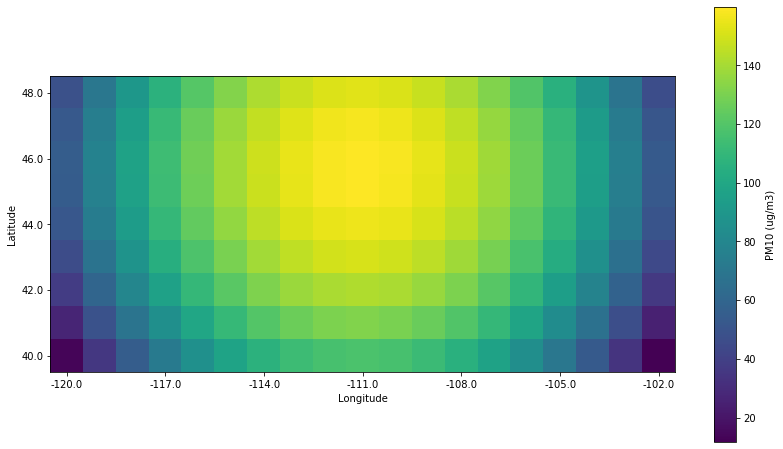

In [61]:
## plot values on a grid. Don't worry too much about how this works yet - we will learn about plotting in a couple of weeks.
import matplotlib.pyplot as plt

def plot_grid(data, long_grid, lat_grid, label):
    fig, ax = plt.subplots(1,1, figsize=(14,8))
    plt.imshow(data)
    plt.colorbar(label = label)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    ax.set_xticks(list(range(0, len(long_grid), 3)))
    ax.set_yticks(list(range(0, len(lat_grid), 2)))
    ax.set_xticklabels(long_grid[::3])
    ax.set_yticklabels(lat_grid[::2])
    
    
plot_grid(pm10, long_grid, lat_grid, 'PM10 (ug/m3)')

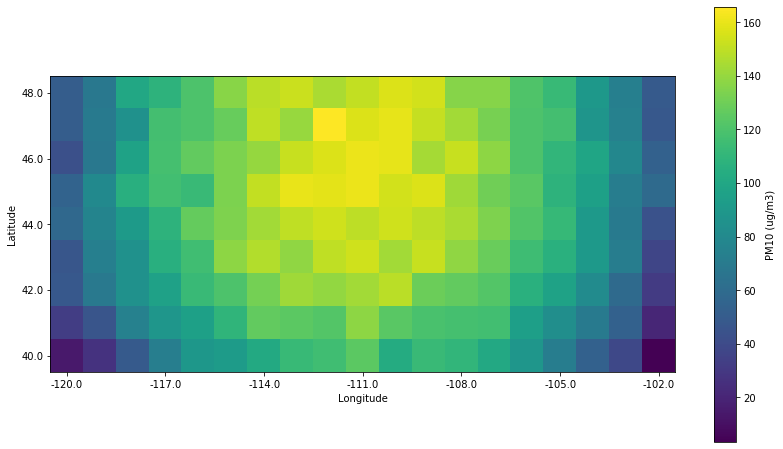

In [62]:
### Now use np.random.normal() to add random noise to the data, with mean and standard distribution of 0 and 5 ug/m3
noise = np.random.normal(0,5,(lat_n, long_n))
pm10_noisy = pm10 + noise

plot_grid(pm10_noisy, long_grid, lat_grid, 'PM10 (ug/m3)')

We will now assume that this "synthetic" dataset is our real data set and use it for analysis. The US EPS's national 24-hour daily standard for PM10 is 150 ug/m3 (for the max 24-hour concentration in one year, averaged over three years. But we will just treat it as a one-day standard for simplicity.)

Use NumPy's built-in functions to answer the following questions:
1. What are the mean and std of PM10 across this region today?

2. Find the mean PM10 for each longitude and latitude.

3. Which longitude has the highest mean PM10? Which latitude has the lowest PM10?

3. What fraction of grid points exceed the EPA daily standard?

4. Use logical indexing to create an array with 1's at locations violating the standard, and 0's at locations not violating the standard. Plot using ``plot_grid``.

5. Assume the following  logistic function (*completely made up, not a real relationship*) for excess cardiovascular deaths per 1,000 people in the region, based on the daily PM10 concentration. 

$$deaths = \frac{15}{1 + \exp(-(PM10 - 80) / 35)}$$

Create a function that uses NumPy to calculate the excess cardio deaths for a grid of pm10 observations, then calculate and plot the grid of excess deaths.